Normalization parameters:

for real images: mean: 17.181818181818183 ; std: 15.545454545454545

for semi-synthetic: mean: 61.66156689772726 ; std: 36.4139976810122

for synthetic lines: mean: 51.227415953125 ; std: 31.554029192471624

In [1]:
from pathlib import Path

import os
import pylab as plt
from skimage import io
import numpy as np

from tracenet.utils.loader import get_loaders
from tracenet.utils.plot import plot_keypoints, show_imgs
from tracenet.models.detr import get_detr

In [2]:
# data_dir = '/research/sharedresources/cbi/data_exchange/hangrp/Development/mt_detection/data_synth/lines_2D_400'
# img_dir = 'img'
# mean_std = (51.23, 31.55)

# data_dir = '/research/sharedresources/cbi/data_exchange/hangrp/Development/mt_detection/data/training_data'
# img_dir = 'img_synth'
# mean_std = (61.66, 36.41)

data_dir = '/research/sharedresources/cbi/data_exchange/hangrp/Development/mt_detection/data/training_data'
img_dir = 'img'
mean_std = (17.18, 15.55)


# model_path = rf'models/happy-mountain-14/best_model.pth'

train_dir = 'train'
val_dir = 'val'
gt_dir = 'csv'
bs = 2

In [3]:
train_dl, val_dl = get_loaders(data_dir, train_dir=train_dir, val_dir=val_dir, 
                               img_dir=img_dir, gt_dir=gt_dir, batch_size=bs, 
                               mean_std=mean_std)

In [4]:
imgs1, imgs2, targets = next(iter(train_dl));

Low image data range; displaying image with stretched contrast.


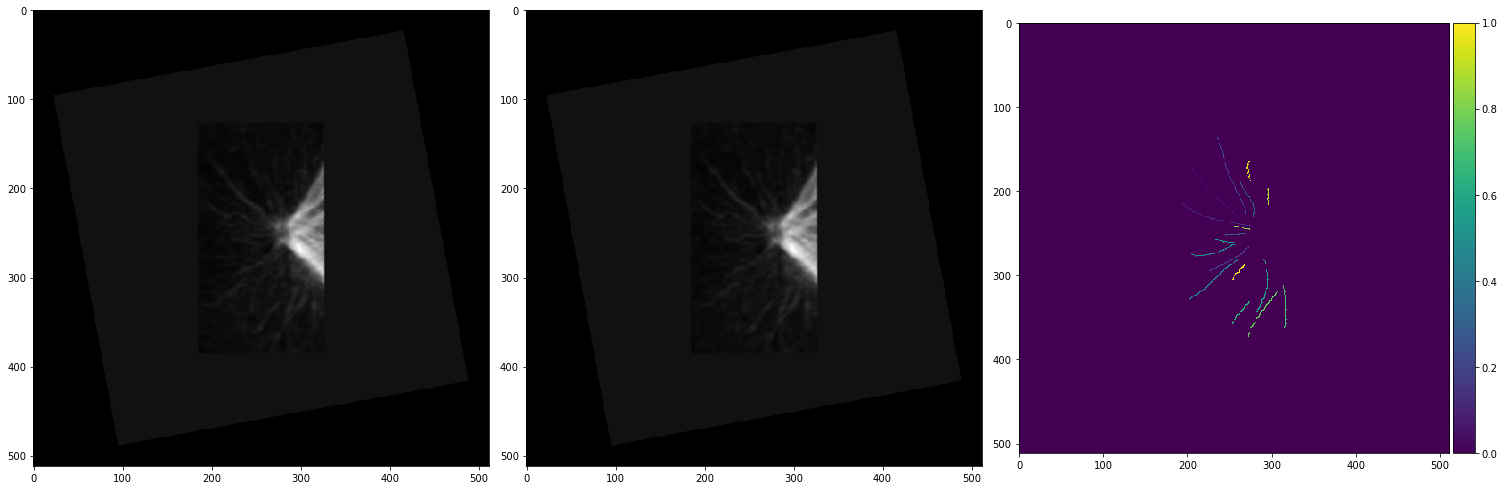

In [5]:
ind = 1
show_imgs([imgs1[ind][0], imgs2[ind][0], targets['labeled_mask'][ind]], s=7, norm=True)
# show_imgs([imgs1[ind][0], imgs2[ind][0], targets['labeled_mask'][ind], targets['mask'][ind]], s=7)

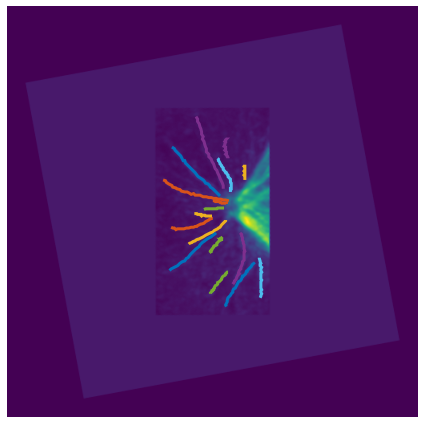

In [6]:
ind = 1
img_gt = plot_keypoints(imgs1[ind][0], targets['keypoints'][ind], targets['point_labels'][ind], return_image=True)

## Prediction

In [7]:
# # propagate through the model
# with torch.no_grad():
#     outputs = model(imgs)

# # keep only predictions with 0.7+ confidence
# probas = outputs['pred_logits'].softmax(-1)[ind, :, :-1]
# keep = probas.max(-1).values > 0.9
# img_model = plot_traces(imgs[ind], outputs['pred_boxes'][ind, keep], return_image=True)

In [8]:
# import pylab as plt
# from skimage import io
# fig, ax = plt.subplots(1, 3, figsize=(15,5))
# titles = ['image', 'ground truth', 'predicted']
# for i, im, in enumerate([imgs[ind].numpy().transpose(1,2,0), img_gt, img_model]):
#     plt.sca(ax[i])
#     plt.title(titles[i])
#     s = int(0.6*im.shape[0])
#     io.imshow(im)
# plt.savefig('TRaceNet_real_data_train.png')